# Horizontal Plots

> A guide to plot data in a horizontal format.

- order: 7

In DABEST **v2025.03.27**, we introduce a new plotting orientation: **horizontal plots**. 

To access this, provide `horizontal=True` to the `.plot()` method.

## Load libraries

In [ ]:
import numpy as np
import pandas as pd
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

Pre-compiling numba functions for DABEST...


Compiling numba functions: 100%|██████████| 11/11 [00:00<00:00, 42.06it/s]

Numba compilation complete!
We're using DABEST v2025.10.20


In [ ]:
#| hide
import warnings
warnings.filterwarnings("ignore") # to suppress warnings related to points not being able to be plotted due to dot size

## Creating a demo dataset

In [ ]:
from scipy.stats import norm # Used in generation of populations.

np.random.seed(9999) # Fix the seed to ensure reproducibility of results.

Ns = 20 # The number of samples taken from each population

# Create samples
c1 = norm.rvs(loc=3, scale=0.4, size=Ns)
c2 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
c3 = norm.rvs(loc=3.25, scale=0.4, size=Ns)

t1 = norm.rvs(loc=3.5, scale=0.5, size=Ns)
t2 = norm.rvs(loc=2.5, scale=0.6, size=Ns)
t3 = norm.rvs(loc=3, scale=0.75, size=Ns)
t4 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
t5 = norm.rvs(loc=3.25, scale=0.4, size=Ns)
t6 = norm.rvs(loc=3.25, scale=0.4, size=Ns)


# Add a `gender` column for coloring the data.
females = np.repeat('Female', Ns/2).tolist()
males = np.repeat('Male', Ns/2).tolist()
gender = females + males

# Add an `id` column for paired data plotting.
id_col = pd.Series(range(1, Ns+1))

# Combine samples and gender into a DataFrame.
df = pd.DataFrame({'Control 1' : c1,     'Test 1' : t1,
                 'Control 2' : c2,     'Test 2' : t2,
                 'Control 3' : c3,     'Test 3' : t3,
                 'Test 4'    : t4,     'Test 5' : t5, 'Test 6' : t6,
                 'Gender'    : gender, 'ID'  : id_col
                })

## Generating two-group plots

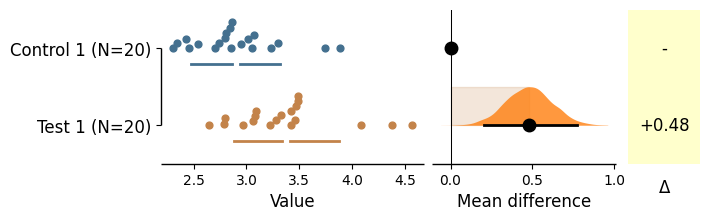

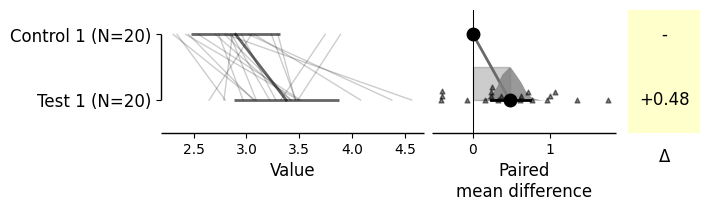

In [ ]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"))
two_groups_unpaired.mean_diff.plot(horizontal=True);

two_groups_paired = dabest.load(df, idx=("Control 1", "Test 1"), paired='baseline', id_col='ID')
two_groups_paired.mean_diff.plot(horizontal=True);

## Generating shared-control and repeated-measures plots

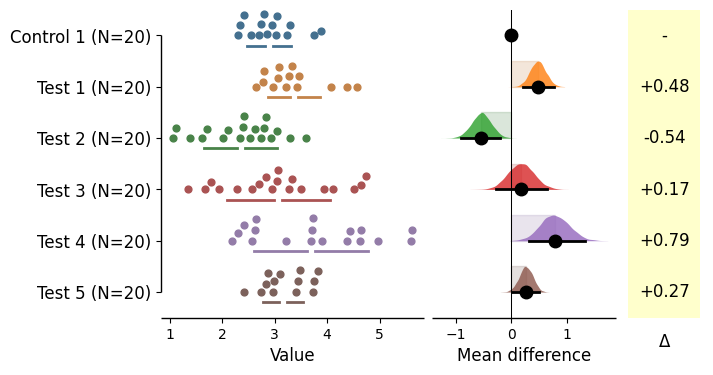

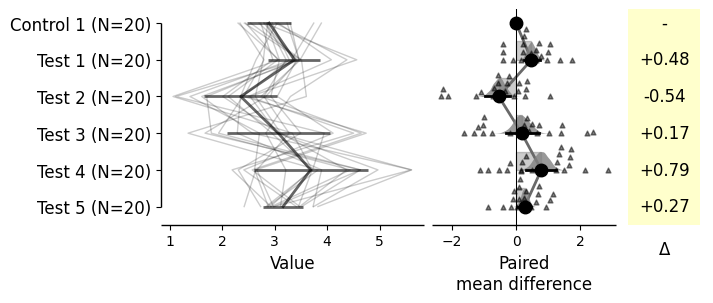

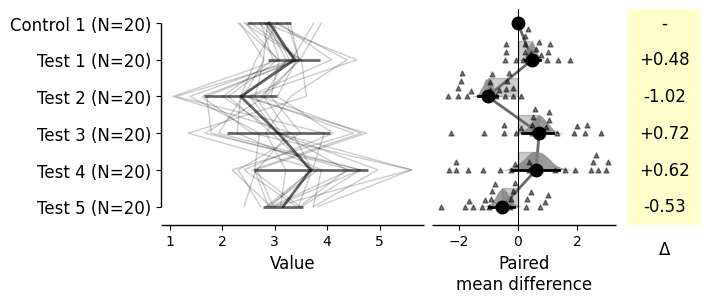

In [ ]:
shared_control = dabest.load(df, idx=("Control 1", "Test 1", "Test 2", "Test 3", "Test 4", "Test 5"))
shared_control.mean_diff.plot(horizontal=True);

repeated_measures_baseline = dabest.load(df, idx=("Control 1", "Test 1", "Test 2", "Test 3", "Test 4", "Test 5"), paired='baseline', id_col='ID')    
repeated_measures_baseline.mean_diff.plot(horizontal=True);

repeated_measures_sequential = dabest.load(df, idx=("Control 1", "Test 1", "Test 2", "Test 3", "Test 4", "Test 5"), paired='sequential', id_col='ID')    
repeated_measures_sequential.mean_diff.plot(horizontal=True);

## Generating multi-group plots

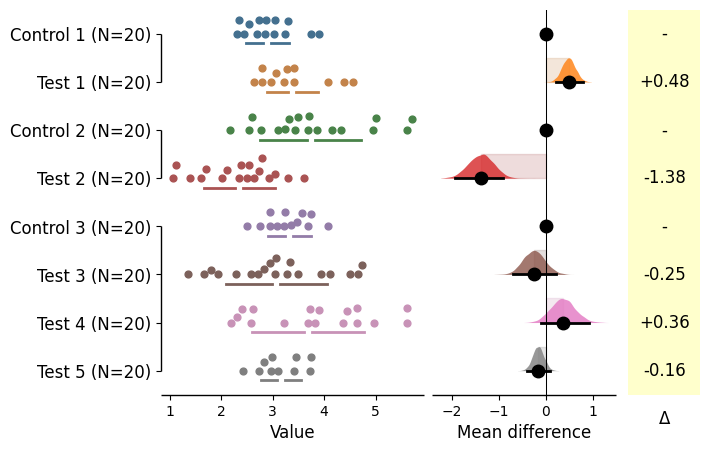

In [ ]:
multi_2group = dabest.load(df, idx=(("Control 1", "Test 1"),("Control 2", "Test 2"),("Control 3", "Test 3", "Test 4", "Test 5")))
multi_2group.mean_diff.plot(horizontal=True);

## Generating proportion plots


In [ ]:
def create_demo_prop_dataset(seed=9999, N=40):
    import numpy as np
    import pandas as pd

    np.random.seed(9999)  # Fix the seed to ensure reproducibility of results.
    # Create samples
    n = 1
    c1 = np.random.binomial(n, 0.2, size=N)
    c2 = np.random.binomial(n, 0.2, size=N)
    c3 = np.random.binomial(n, 0.8, size=N)

    t1 = np.random.binomial(n, 0.6, size=N)
    t2 = np.random.binomial(n, 0.2, size=N)
    t3 = np.random.binomial(n, 0.3, size=N)
    t4 = np.random.binomial(n, 0.4, size=N)
    t5 = np.random.binomial(n, 0.5, size=N)
    t6 = np.random.binomial(n, 0.6, size=N)
    t7 = np.ones(N)
    t8 = np.zeros(N)
    t9 = np.zeros(N)

    # Add a `gender` column for coloring the data.
    females = np.repeat('Female', N / 2).tolist()
    males = np.repeat('Male', N / 2).tolist()
    gender = females + males

    # Add an `id` column for paired data plotting.
    id_col = pd.Series(range(1, N + 1))

    # Combine samples and gender into a DataFrame.
    df = pd.DataFrame({'Control 1': c1, 'Test 1': t1,
                       'Control 2': c2, 'Test 2': t2,
                       'Control 3': c3, 'Test 3': t3,
                       'Test 4': t4, 'Test 5': t5, 'Test 6': t6,
                       'Test 7': t7, 'Test 8': t8, 'Test 9': t9,
                       'Gender': gender, 'ID': id_col
                       })

    return df
df_prop = create_demo_prop_dataset()

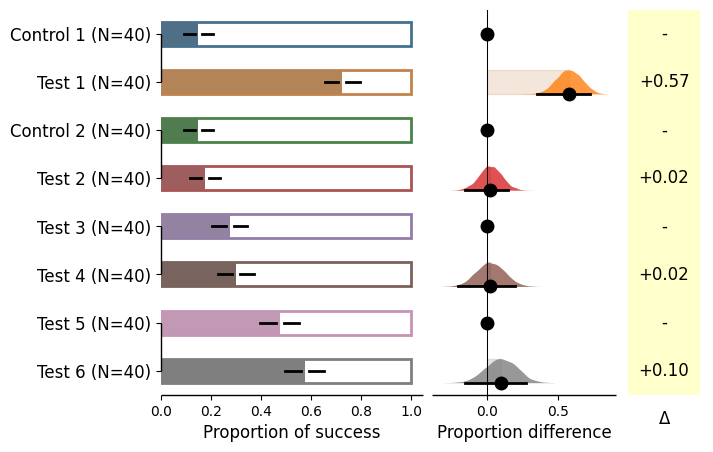

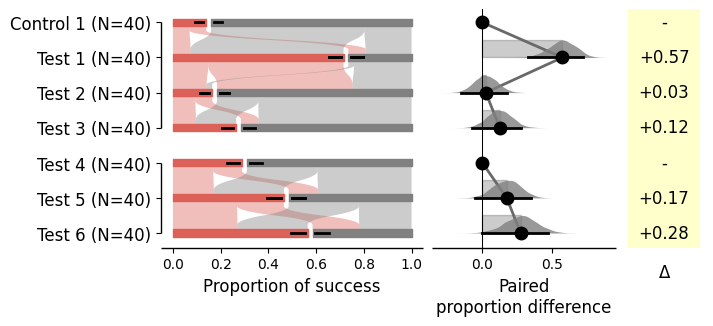

In [ ]:
multi_two_groups_unpaired = dabest.load(df_prop, idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Test 3", "Test 4"), ("Test 5", "Test 6")), proportional=True)
multi_two_groups_unpaired.mean_diff.plot(horizontal=True);

multi_group_baseline = dabest.load(df_prop, idx=((("Control 1", "Test 1","Test 2", "Test 3"),("Test 4", "Test 5", "Test 6"))),proportional=True, paired="baseline", id_col="ID")
multi_group_baseline.mean_diff.plot(horizontal=True);

## Generating delta-delta plots

In [ ]:
from scipy.stats import norm # Used in generation of populations.
np.random.seed(9999) # Fix the seed to ensure reproducibility of results.

# Create samples
N = 20
y = norm.rvs(loc=3, scale=0.4, size=N*4)
y[N:2*N] = y[N:2*N]+1
y[2*N:3*N] = y[2*N:3*N]-0.5

# Add a `Treatment` column
t1 = np.repeat('Placebo', N*2).tolist()
t2 = np.repeat('Drug', N*2).tolist()
treatment = t1 + t2 

# Add a `Rep` column as the first variable for the 2 replicates of experiments done
rep = []
for i in range(N*2):
    rep.append('Rep1')
    rep.append('Rep2')

# Add a `Genotype` column as the second variable
wt = np.repeat('W', N).tolist()
mt = np.repeat('M', N).tolist()
wt2 = np.repeat('W', N).tolist()
mt2 = np.repeat('M', N).tolist()


genotype = wt + mt + wt2 + mt2

# Add an `id` column for paired data plotting.
id = list(range(0, N*2))
id_col = id + id 


# Combine all columns into a DataFrame.
df_delta2 = pd.DataFrame({'ID'        : id_col,
                  'Rep'      : rep,
                   'Genotype'  : genotype, 
                   'Treatment': treatment,
                   'Y'         : y
                })

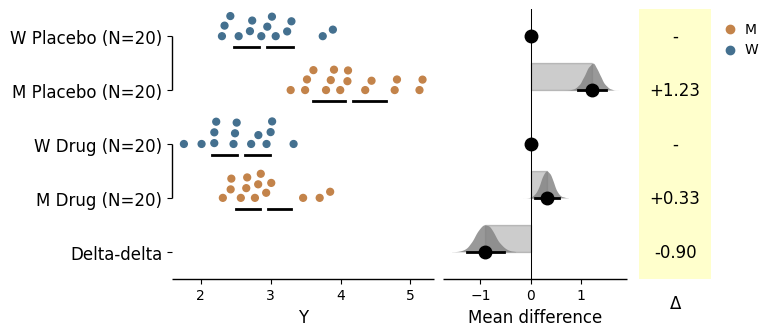

In [ ]:
unpaired_delta2 = dabest.load(data = df_delta2, x = ["Genotype", "Genotype"], y = "Y", delta2 = True, experiment = "Treatment")
unpaired_delta2.mean_diff.plot(horizontal=True);

## Generating mini-meta plots

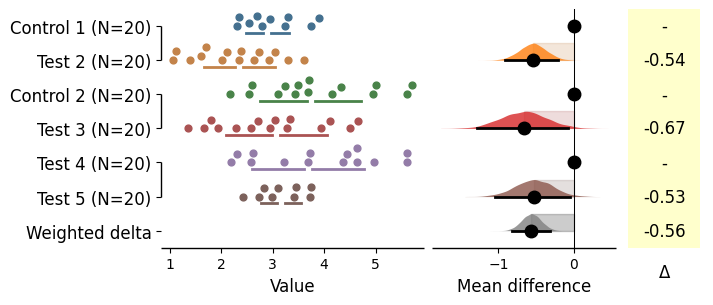

In [ ]:
unpaired = dabest.load(df, idx=(("Control 1", "Test 2"), ("Control 2", "Test 3"), ("Test 4", "Test 5")), mini_meta=True)
unpaired.mean_diff.plot(horizontal=True);

## Controlling aesthetics

As with the vertical plots, horizontal plots can be customized using the same options. Shown below are a few cases where the aesthetics are modified, added functionality, or just less intuitive.

### Swarm side

As with the vertical plots, you can specify the side of the swarms via `swarm_side` in the `.plot()` method. 

In this case, `swarm_side='left'` would plot the swarms upwards, and `swarm_side='right'` would plot the swarms downwards.

Default is `swarm_side='left'`

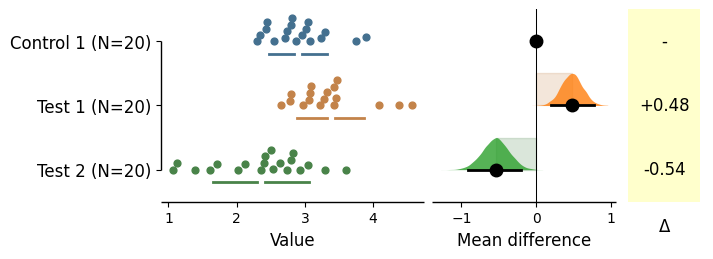

In [ ]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1", 'Test 2'), resamples=5000)
two_groups_unpaired.mean_diff.plot(swarm_side='left', horizontal=True);

`swarm_side='center'`

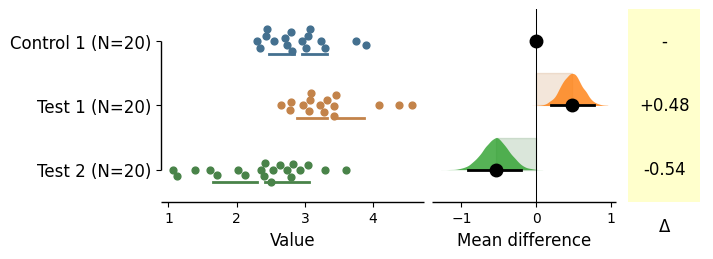

In [ ]:
two_groups_unpaired.mean_diff.plot(swarm_side='center', horizontal=True);

`swarm_side='right'`

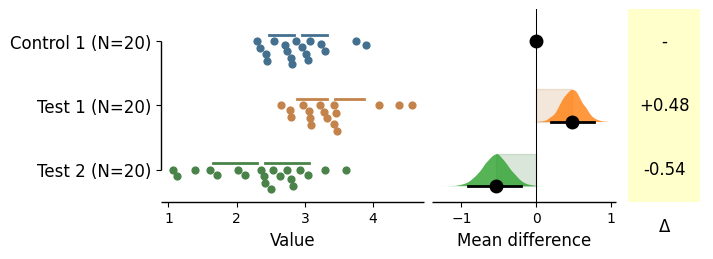

In [ ]:
two_groups_unpaired.mean_diff.plot(swarm_side='right', horizontal=True);

### Table kwargs

The table axis can be customized using the `horizontal_table_kwargs` argument. A dict of keywords can be passed to customize the table. 

If None, the following keywords are passed:

- `'show'` - Whether to show the table. Default is True.
- `'color'` - The color of the table. Default is 'yellow'.
- `'alpha'` - The transparency of the table. Default is 0.2.
- `'fontsize'` - The fontsize of the table. Default is 12.
- `'text_color'` - The color of the text in the table. Default is 'black'.
- `'text_units'` - The units of the text in the table. Default is None. 
- `'control_marker'` - The marker for the control group. Default is '-'.
- `'fontsize_label'` - The fontsize of the table x-label. Default is 12.
- `'label'` - The table x-label.

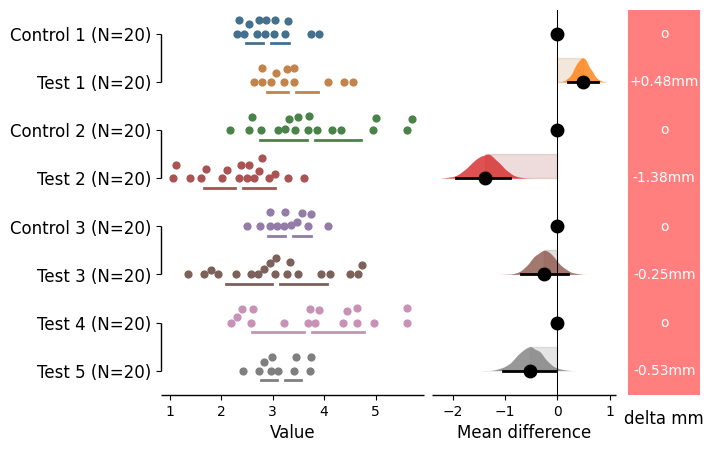

In [ ]:
multi_2group = dabest.load(df, idx=(("Control 1", "Test 1"),("Control 2", "Test 2"),("Control 3", "Test 3"),("Test 4", "Test 5")))
multi_2group.mean_diff.plot(horizontal=True, 
                            horizontal_table_kwargs={'color': 'red', 
                                                     'alpha': 0.5, 
                                                     'text_color': 
                                                     'white',
                                                     'text_units':'mm', 
                                                     'label': 'delta mm',
                                                     'control_marker': 'o',
                                                    });

The table axis can be hidden using the `'show':False` in the `horizontal_table_kwargs` dict.

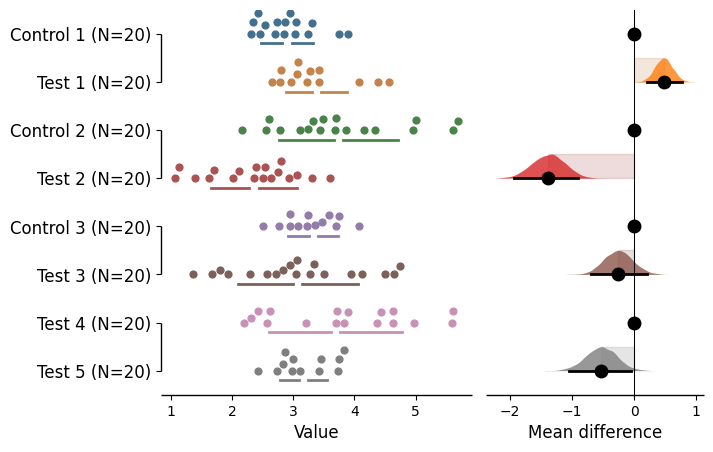

In [ ]:
multi_2group = dabest.load(df, idx=(("Control 1", "Test 1"),("Control 2", "Test 2"),("Control 3", "Test 3"),("Test 4", "Test 5")))
multi_2group.mean_diff.plot(horizontal=True, horizontal_table_kwargs={'show': False});

### Gridkey 

As with the vertical plots, you can utilise a gridkey table for representing the groupings. This can be reached via `gridkey` in the `.plot()` method. 

You can either use `gridkey='auto'` to automatically generate the gridkey, or pass a list of indexes to represent the groupings (e.g., `gridkey=['Control', 'Test']`).

See the examples in the [Plot Aesthetics Tutorial](08-plot_aesthetics.html) for more information with regards to kwargs.

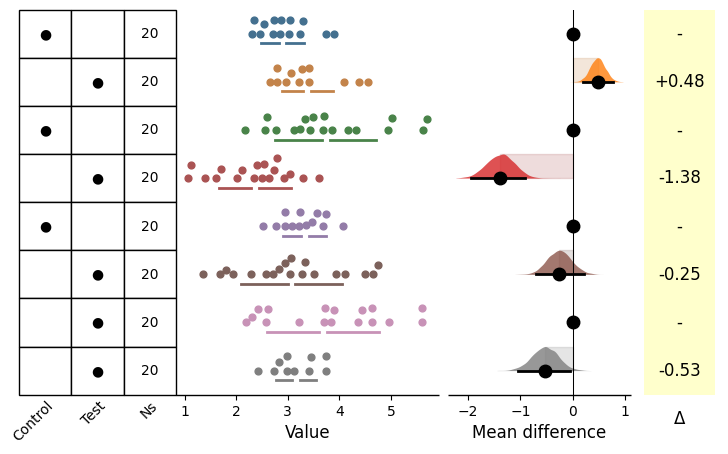

In [ ]:
multi_2group = dabest.load(df, idx=(("Control 1", "Test 1"),("Control 2", "Test 2"),("Control 3", "Test 3"),("Test 4", "Test 5")))
multi_2group.mean_diff.plot(horizontal=True, gridkey=['Control', 'Test']);